In [1]:
##NOTE: This notebook will run properly ONLY on PYTHON 3 KERNEL

import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib.backends.backend_pdf import PdfPages
#from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib as mpl
import numpy as np #import for transposing
import math

In [2]:
obs_data = pd.read_csv('../Mongoose Modeling/Observations.csv')
obs_data = pd.DataFrame(obs_data)
obs_data.shape

(20851, 87)

In [3]:
list(obs_data) 

['ObservationID',
 'ObservationTime',
 'ObservationTimeApproximate',
 'Troop',
 'Observer',
 'ObservationType',
 'UTMNorthing',
 'UTMEasting',
 'LocationApproximate',
 'LocationDescription',
 'Notes',
 'ST',
 'STUncertain',
 'SM',
 'SMUncertain',
 'SF',
 'SFUncertain',
 'SU',
 'SUUncertain',
 'SA',
 'SAUncertain',
 'SAM',
 'SAMUncertain',
 'SAF',
 'SAFUncertain',
 'SAFP',
 'SAFPUncertain',
 'SAFL',
 'SAFLUncertain',
 'SAFEN',
 'SAFENUncertain',
 'SAU',
 'SAUUncertain',
 'SS',
 'SSUncertain',
 'SSM',
 'SSMUncertain',
 'SSF',
 'SSFUncertain',
 'SSU',
 'SSUUncertain',
 'SSU.1',
 'SJUncertain',
 'SJM',
 'SJMUncertain',
 'SJF',
 'SJFUncertain',
 'SJU',
 'SJUUncertain',
 'IT',
 'ITUncertain',
 'IM',
 'IMUncertain',
 'IF',
 'IFUncertain',
 'IU',
 'IUUncertain',
 'IA',
 'IAUncertain',
 'IAM',
 'IAMUncertain',
 'IAF',
 'IAFUncertain',
 'IAFP',
 'IAFPUncertain',
 'IAFL',
 'IAFLUncertain',
 'IAFEN',
 'IAFENUncertain',
 'IAU',
 'IAUUncertain',
 'IS',
 'ISUncertain',
 'ISM',
 'ISMUncertain',
 'ISF'

In [4]:
#Are SA and IA sums?

adults = pd.DataFrame(obs_data, columns = ['ObservationTime','Troop','SA','SAUncertain','SAM','SAMUncertain','SAF','SAFUncertain','SAFP','SAFPUncertain','SAFL','SAFLUncertain','SAFEN','SAFENUncertain','SAU','SAUUncertain'])
adults = adults.fillna(0)

adults['SAT'] = adults.SAUncertain + adults.SAM + adults.SAMUncertain + adults.SAF + adults.SAFUncertain + adults.SAFP + adults.SAFPUncertain + adults.SAFEN + adults.SAFENUncertain + adults.SAU + adults.SAUUncertain 


In [5]:
##Calculate total number of times the total of SA's is equal to SA

compare = pd.DataFrame(adults, columns = ['SA','SAT'])
compare[(compare.SA == compare.SAT) & (compare.SA != 0)].shape

(160, 2)

In [6]:
##Plot population sizes for each age group

def age_group_plot(age_group):
    sus = 'S' + age_group
    inf = 'I' + age_group
    
    a = plt.figure(1)
    ad_num = pd.DataFrame(obs_data, columns = ['ObservationTime','Troop',sus,inf])
    ad_num['total'] = obs_data[sus] + obs_data[inf]
    #ad_num = ad_num.dropna()
    a = plt.plot_date(x = ad_num['ObservationTime'],y=ad_num['total'])
    plt.xticks(rotation = 'vertical')
    plt.show(a)

    b = plt.figure(2)
    sample_series = ad_num.set_index('ObservationTime')['total']
    sample_series = pd.Series(sample_series)
    sample_series = sample_series.dropna()
    b = sample_series.plot()
    plt.xticks(rotation = 'vertical')
    plt.show(b)

    return ad_num
    

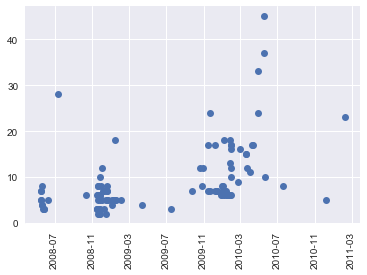

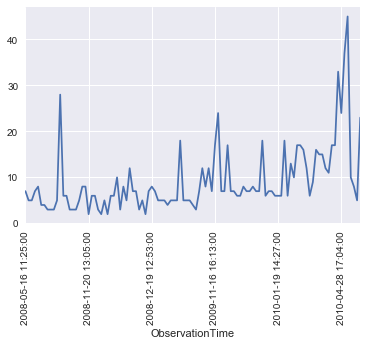

In [7]:
total_ad = age_group_plot('A')

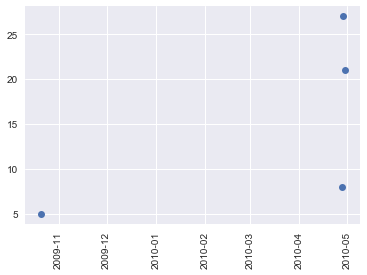

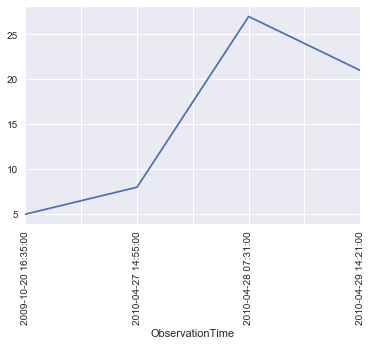

In [8]:
total_sub = age_group_plot('S')

In [9]:
#total_juv = age_group_plot('J')

##error: there is no column SJ or IJ for total juveniles

# Model Function

This is the structure for the function. 
Working on syntax and properties of the final model function

Let each time interval/generation (i) be 3 months. Thus, pups and juveniles age up to the next age-group in one time interval/generation (each i) and sub-adults age up to the next age-group in two time intervals/generations.

P (vector) = pups 

J (vector) = juveniles

S (vector) = sub-adults

A (vector) = adults

R (vector) = breeders (a subgroup of adults)

---------------------
PARAMETERS
----------------------
total_gen = total number of time intervals/generations observed

b = birth rate for pups

B = probability of adult becoming a breeder

s_p = survival rate of pups
    *depends on death rate of pups

s_j = survival rate of juveniles
    *depends on death rate of juveniles
    
s_s = survival rate of sub-adults
    *depends on survival rate of previous generation sub-adults AND death rate of sub-adults each generation

s_a = survival rate of adults
    *depends on survival rate of previous generation adults AND death rate of adults
    
R_cap = maximum capacity of breeders
    *i.e. the maximum percentage of adults that can be breeders

Base Model (without good rates)

P0:  51
J0:  10
S0:  1
A0:  69
b:  0.2861483709792214
B:  0.8062547272533269
s_p:  0.7854749069983938
s_j:  0.5105111537362875
s_s:  0.49077096310806434
s_a:  0.9375115372908774


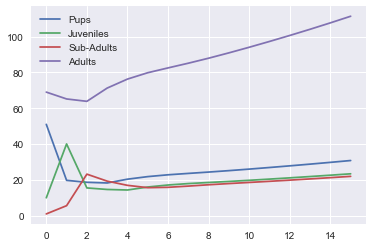

In [10]:
total_gen = 16 ##16 generations = 4 years

##Initialize population vectors
P = [0]*total_gen
J = [0]*total_gen
S = [0]*total_gen
A = [0]*total_gen


##Enter parameter values (Random place holders entered for now)
b = np.random.uniform(0,1)
B = np.random.uniform(0,1)
s_p = np.random.uniform(0,1)
s_j = np.random.uniform(0,1)
s_s = np.random.uniform(0,1)
s_a = np.random.uniform(0,1)

parameter_list = [b,B,s_p,s_j,s_s,s_a]
string_list = ['b','B','s_p','s_j','s_s','s_a']

##Initial conditions
P[0] = np.random.randint(low = 0, high = 100)
J[0] = np.random.randint(low = 0, high = 100)
S[0] = np.random.randint(low = 0, high = 100)
A[0] = np.random.randint(low = 0, high = 100)

IC_list = [P[0],J[0],S[0],A[0]]
IC_str = ['P0','J0','S0','A0']

##The model
for i in range(0,total_gen-1):
    P[i+1] = b*A[i]
    
    J[i+1] = s_p*P[i]
    
    S[i+1] = s_j*J[i] + s_s*S[i]
    
    A[i+1] = s_s*S[i] + s_a*A[i]
    
    
##Build a plot
plt.plot(range(0,total_gen),P,label = "Pups")
plt.plot(range(0,total_gen),J,label = "Juveniles")
plt.plot(range(0,total_gen),S,label = "Sub-Adults")
plt.plot(range(0,total_gen),A, label = "Adults")

plt.legend()

##Print Initial Conditions
for k in range(len(IC_list)):
    print(IC_str[k]+": ",IC_list[k])

##Print parameters
for j in range(len(parameter_list)):
    print(string_list[j] + ': ',parameter_list[j])

Base Model (with realistic rates)

P0:  40
J0:  93
S0:  43
A0:  66
b:  1.00925
B:  0.41159400160758053
s_p:  0.29900000000000004
s_j:  0.655
s_s:  0.784
s_a:  0.857


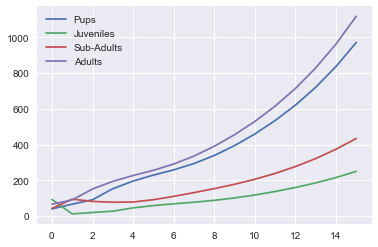

In [11]:
total_gen = 16 ##16 generations = 4 years

##Initialize population vectors
P = [0]*total_gen
J = [0]*total_gen
S = [0]*total_gen
A = [0]*total_gen


##Enter parameter values (Random place holders entered for now)
b = 4.037/4
B = np.random.uniform(0,1)
s_p = 1 - 0.701
s_j = 1 - 0.345
s_s = 1 - 0.216
s_a = 1 - 0.143

parameter_list = [b,B,s_p,s_j,s_s,s_a]
string_list = ['b','B','s_p','s_j','s_s','s_a']

##Initial conditions
P[0] = np.random.randint(low = 0, high = 100)
J[0] = np.random.randint(low = 0, high = 100)
S[0] = np.random.randint(low = 0, high = 100)
A[0] = np.random.randint(low = 0, high = 100)

IC_list = [P[0],J[0],S[0],A[0]]
IC_str = ['P0','J0','S0','A0']

##The model
for i in range(0,total_gen-1):
    P[i+1] = b*A[i]

    J[i+1] = s_p*P[i]

    S[i+1] = s_j*J[i] + s_s*S[i]

    A[i+1] = s_s*S[i] + s_a*A[i]

    
##Build a plot
plt.plot(range(0,total_gen),P,label = "Pups")
plt.plot(range(0,total_gen),J,label = "Juveniles")
plt.plot(range(0,total_gen),S,label = "Sub-Adults")
plt.plot(range(0,total_gen),A, label = "Adults")

plt.legend()

##Print Initial Conditions
for k in range(len(IC_list)):
    print(IC_str[k]+": ",IC_list[k])

##Print parameters
for j in range(len(parameter_list)):
    print(string_list[j] + ': ',parameter_list[j])

Model Extension

b:  2.3400000000000003
s_p:  0.47425000000000006
s_j:  0.74125
s_s:  0.838
s_a:  0.95


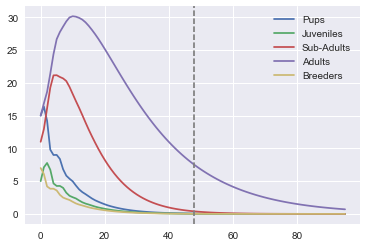

In [12]:
##Be sure to test these models with numbers (troop sizes/age distribution) from observation data

total_gen = 4*24 ##16 generations = 4 years  <=> 4x generations = x years

##Initialize population vectors
P = [0]*total_gen
J = [0]*total_gen
S = [0]*total_gen
A = [0]*total_gen
R = [0]*total_gen


##Enter parameter values (Random place holders entered for now)
b = (2.6*3.6)/4
s_p = 1 - (0.75*0.701)
s_j = 1 - (0.75*0.345)
s_s = 1 - (0.75*0.216)
s_a = .95
R_cap = 0.6

parameter_list = [b,s_p,s_j,s_s,s_a]
string_list = ['b','s_p','s_j','s_s','s_a']

##Initial conditions
P[0] = 15
J[0] = 5
S[0] = 11
A[0] = 15
R[0] = 7

IC_list = [P[0],J[0],S[0],A[0],R[0]]
IC_str = ['P0','J0','S0','A0','R0']

##The model
for i in range(0,total_gen-1):
    
    ##Conditions for first time interval
    if i == 0:
        
        P[i+1] = b*R[i]

        J[i+1] = s_p*P[i]

        S[i+1] = s_j*J[i] + s_s*S[i] #no subtraction term here because can not go further back than 0

        A[i+1] = (math.pow(s_s,2))*s_j*J[0] + s_a*A[i]
        
        R[i+1] = 0.5*(0.5*S[i] + s_a*R[i])     
            
    ##Conditions for up to 12 years (lifespan)
    elif i < 48:
        P[i+1] = b*R[i]
        if P[i+1] <= 0:
            P[i+1] = 0

        J[i+1] = s_p*P[i]
        if J[i+1] <= 0:
            J[i+1] = 0

        S[i+1] = s_j*J[i] + s_s*S[i] #subtraction term forces out subadults going into third time interval
        if S[i+1] <= 0:                           #remember subadults remain in this stage for two time intervals
            S[i+1] = 0  
                
        A[i+1] = (math.pow(s_s,2))*s_j*J[i-1] + s_a*A[i]
        if A[i+1] <= 0:
            A[i+1] = 0
            
        R[i+1] = 0.5*((math.pow(s_s,2))*s_j*J[i-1] + s_a*R[i])
        if R[i+1] <= 0:
            R[i+1] = 0
        if R[i+1] > A[i+1]:
            R[i+1] = A[i]
           
            
    ##Conditions for over twelve years (lifespan)
    else: 
        P[i+1] = b*R[i]
        if P[i+1] <= 0:
            P[i+1] = 0

        J[i+1] = s_p*P[i]
        if J[i+1] <= 0:
            J[i+1] = 0

        S[i+1] = s_j*J[i] + s_s*S[i]#subtraction term forces out subadults going into third time interval
        if S[i+1] <= 0:                           #remember subadults remain in this stage for two time intervals
            S[i+1] = 0  
                
        A[i+1] = (math.pow(s_s,2))*J[i-1] + s_a*A[i] #- (math.pow(s_a,48)*A[i-48])
        if A[i+1] <= 0:
            A[i+1] = 0
            
        R[i+1] = 0.5*((math.pow(s_s,2))*s_j*J[i-1] + s_a*R[i])
        if R[i+1] <= 0: 
            R[i+1] = 0
        if R[i+1] > A[i+1]: #can't have more breeders than adults
            R[i+1] = A[i]


    
##Build a plot
plt.plot(range(0,total_gen),P,label = "Pups")
plt.plot(range(0,total_gen),J,label = "Juveniles")
plt.plot(range(0,total_gen),S,label = "Sub-Adults")
plt.plot(range(0,total_gen),A, label = "Adults")
plt.plot(range(0,total_gen),R, label = "Breeders")



plt.legend()

##Print parameters
for j in range(len(parameter_list)):
    print(string_list[j] + ': ',parameter_list[j])
    
##DataFrame of model results
pop_size = pd.DataFrame(np.transpose([P,J,S,A,R]), columns = ["Pups","Juveniles","Sub-Adults","Adults","Breeders"])
plt.axvline(48,color = 'gray', linestyle = 'dashed')

Model (2nd Draft)

b:  0.9
s_p:  0.82475
s_j:  0.9137500000000001
s_s:  0.946
s_a:  0.96425


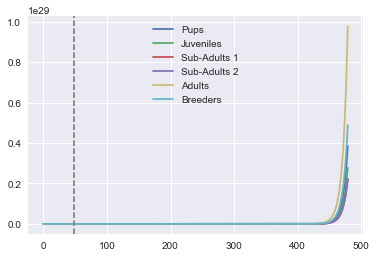

In [13]:
##Be sure to test these models with numbers (troop sizes/age distribution) from observation data

total_gen = 4*120 ##16 generations = 4 years  <=> 4x generations = x years

##Initialize population vectors
P = [0]*total_gen
J = [0]*total_gen
S1 = [0]*total_gen
S2 = [0]*total_gen
A = [0]*total_gen
R = [0]*total_gen


##Enter parameter values (Random place holders entered for now)
b = (3.6)/4
s_p = 1 - (0.25*0.701)
s_j = 1 - (0.25*0.345)
s_s = 1 - (0.25*0.216)
s_a = 1 - (0.25*0.143)

parameter_list = [b,s_p,s_j,s_s,s_a]
string_list = ['b','s_p','s_j','s_s','s_a']

##Initial conditions
P[0] = 15
J[0] = 5
S1[0] = 6
S2[0] = 6
A[0] = 15
R[0] = 7

IC_list = [P[0],J[0],S1[0],S2[0],A[0],R[0]]
IC_str = ['P0','J0','S10','S20','A0','R0']

##The model
for i in range(0,total_gen-1):
    
    ##Conditions for up to 12 years (lifespan)
    if i < 48:
        P[i+1] = b*R[i]

        J[i+1] = s_p*P[i]

        S1[i+1] = s_j*J[i]
        
        S2[i+1] = s_s*S1[i]
                
        A[i+1] = s_s*S2[i] + s_a*A[i]
            
        R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]
           
            
    ##Conditions for over twelve years (lifespan)
    else: 
        P[i+1] = b*R[i]

        J[i+1] = s_p*P[i]

        S1[i+1] = s_j*J[i]
        
        S2[i+1] = s_s*S1[i]
                
        A[i+1] = s_s*S2[i] + s_a*A[i] - (s_a/48)*A[i-48]
            
        R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

    
##Build a plot
plt.plot(range(0,total_gen),P,label = "Pups")
plt.plot(range(0,total_gen),J,label = "Juveniles")
plt.plot(range(0,total_gen),S1,label = "Sub-Adults 1")
plt.plot(range(0,total_gen),S1,label = "Sub-Adults 2")
plt.plot(range(0,total_gen),A, label = "Adults")
plt.plot(range(0,total_gen),R, label = "Breeders")



plt.legend()

##Print parameters
for j in range(len(parameter_list)):
    print(string_list[j] + ': ',parameter_list[j])
    
##DataFrame of model results
pop_size = pd.DataFrame(np.transpose([P,J,S1,S2,A,R]), columns = ["Pups","Juveniles","Sub-Adults(1)","Sub-Adults(2)","Adults","Breeders"])
plt.axvline(48,color = 'gray', linestyle = 'dashed')

In [14]:
pop_size

,Pups,Juveniles,Sub-Adults(1),Sub-Adults(2),Adults,Breeders
0,1.500000e+01,5.000000e+00,6.000000e+00,6.000000e+00,1.500000e+01,7.000000e+00
1,6.300000e+00,1.237125e+01,4.568750e+00,5.676000e+00,2.013975e+01,9.587750e+00
2,8.628975e+00,5.195925e+00,1.130423e+01,4.322038e+00,2.478925e+01,1.192974e+01
3,1.073676e+01,7.116747e+00,4.747776e+00,1.069380e+01,2.799168e+01,1.354757e+01
4,1.219281e+01,8.855145e+00,6.502928e+00,4.491397e+00,3.710732e+01,1.812141e+01
5,1.630927e+01,1.005602e+01,8.091389e+00,6.151770e+00,4.002959e+01,1.959800e+01
6,1.763820e+01,1.345107e+01,9.188692e+00,7.654454e+00,4.441811e+01,2.180716e+01
7,1.962645e+01,1.454711e+01,1.229092e+01,8.692502e+00,5.007127e+01,2.464811e+01
8,2.218330e+01,1.618691e+01,1.329242e+01,1.162721e+01,5.650433e+01,2.787850e+01
9,2.509065e+01,1.829568e+01,1.479079e+01,1.257463e+01,6.548364e+01,3.238151e+01


# Necropsy Records

In [15]:
necrop = pd.read_csv('../Mongoose Modeling/Necropsy Records.csv')
necrop = necrop.rename(index = str, columns = {"CauseOfDeath":"COD"})
necrop.shape

(548, 39)

In [16]:
#Fixing isolated issues

##df.loc[row_index,column_name] <=>df[column_name][row_index]
##NOTE: when using .loc, row_index must be a string

necrop.loc['534','Month'] = 8
necrop.loc['534','Day'] = 15


for i in range(len(necrop)):
    if necrop.loc[str(i),'COD'] == 'Unknown':
        necrop.loc[str(i),'COD'] = 'Other'
        
    if necrop.loc[str(i),'COD'] == 'Self Predation':
        necrop.loc[str(i),'COD'] = 'Other'
        
    if str(i) in list(necrop.loc[necrop.COD.notnull() == False].index.values):
        necrop.loc[str(i),'COD'] = 'Other'


In [17]:
necrop["COD"].unique()

array(['TB', 'Other', 'Roadkill', 'Predation'], dtype=object)

In [18]:
 def death_rate(cause):
    ##Make a dataframe (df) with specified cause of death (cod)
    death = pd.DataFrame(necrop, columns = ["Year","Month","Day","COD"])
    death = death[death["COD"] == cause]
    cod = pd.DataFrame(death, columns = ["Year","Month","Day"]).dropna()
    cod = pd.DataFrame(pd.to_datetime(cod)).rename(index = str, columns = {0:"Date"}).sort_values(by='Date').reset_index(drop = True)

    #Add a column that strips years from the date
    #This makes sorting a little easier
    ser = []
    for i in range(len(cod)):
        ser.append(cod["Date"][i].year)
    cod["Year"] = ser  
    
    #Iterate through the unique years in the df
    #Each row of the "group" df represents a death/necropsy observation
    years = cod.Year.unique()
    dates = []
    rates = []
    for i in years:
        group = cod.groupby(['Year'])
        group = group.get_group(i).reset_index()
        if len(group) > 1 :
            date_diff = (group["Date"].iloc[-1]- group["Date"][0]).days
        
            if date_diff == 0:
                continue
            else:
                dates.append(date_diff)
                rate = len(group)/date_diff #The rates are mongoose per day
                rate = rate*(7*4*3) #This term comes from stoichiometry (puts the rate in the 3 month unit we need)
                rates.append(rate)
                total = sum(rates)/len(rates)
    for i in range(len(rates)):
        print(rates[i]," per 3 months")
    print()    
    print("Total average: ",total," per 3 months")
    
    return total

In [19]:
death_rate('Roadkill')

6.810810810810811  per 3 months
1.8529411764705883  per 3 months
1.9864864864864866  per 3 months
1.627906976744186  per 3 months
1.5319148936170213  per 3 months
2.638743455497382  per 3 months
5.813148788927336  per 3 months

Total average:  3.180278941221973  per 3 months


3.180278941221973

In [20]:
death_rate('TB')

3.888888888888889  per 3 months
2.2580645161290325  per 3 months
1.2844036697247707  per 3 months
2.3773584905660377  per 3 months
5.675675675675676  per 3 months
6.461538461538462  per 3 months

Total average:  3.657654950420478  per 3 months


3.657654950420478

In [21]:
death_rate('Predation')

2.8  per 3 months
2.2366863905325443  per 3 months
3.060728744939271  per 3 months
0.9940828402366864  per 3 months
0.8936170212765957  per 3 months
1.6258064516129034  per 3 months

Total average:  1.935153574766333  per 3 months


1.935153574766333

In [22]:
death_rate('Other')

7.875  per 3 months
5.478260869565217  per 3 months
19.384615384615387  per 3 months
17.50985915492958  per 3 months
5.7534246575342465  per 3 months
13.477611940298507  per 3 months
2.6782608695652175  per 3 months
4.085106382978723  per 3 months
2.3496503496503496  per 3 months
9.46075085324232  per 3 months
11.045871559633028  per 3 months
21.715909090909093  per 3 months
15.781818181818181  per 3 months

Total average:  10.507395330364602  per 3 months


10.507395330364602

# Necropsy Records Intersected with Census Data

In [23]:
##"Importing" list of significant troops from the census data


mon_data = pd.read_csv("../Mongoose Modeling/Standardized Date.csv")

def clean_date(x):
        return datetime.strptime(x,'%d-%b-%y')

mon_data['Date'] = mon_data.Date.apply(lambda x: clean_date(x))

#################################################################

death = pd.DataFrame(mon_data, columns = ["Date","Troop","Troop Number","Complete Count?"])

death = death.dropna(subset = ["Troop Number","Date","Troop"])

death = death[death["Complete Count?"] != 'No']

#################################################################

##Additional df to sort death by troop

grouped = death.groupby("Troop")


#################################################################

wd = death.groupby("Troop").count().reset_index()

df = pd.DataFrame(wd, columns = ["Troop","Troop Number"])

#################################################################

clean = df[df["Troop Number"] > 10]

clean_list = list(clean["Troop"])


In [24]:
##troop_df contains necropsy records per troop
##death contains troop size info
    ##The names are a little backwards
troop_df = []

for i in clean_list:
    troop = necrop[necrop["Troop"] == i]
    copy = pd.DataFrame(troop, columns = ["Troop","COD"]).reset_index(drop = True)
    troop = pd.DataFrame(troop, columns = ["Year","Month","Day"])
    troop = pd.DataFrame(pd.to_datetime(troop)).rename(index = str, columns = {0:"Date"}).sort_values(by='Date').reset_index(drop = True)
    troop = pd.concat([troop,copy], axis = 1)
    
    troop_df.append(troop)
    

In [25]:
troop_df[0]

,Date,Troop,COD
0,2000-06-29,CCH,TB
1,2000-07-10,CCH,Other
2,2000-08-13,CCH,Other
3,2003-06-01,CCH,TB
4,2004-09-16,CCH,TB
5,2007-12-12,CCH,Other
6,2007-12-22,CCH,Other
7,2007-12-27,CCH,Other
8,2008-01-08,CCH,Other
9,2008-01-08,CCH,Other


In [26]:
grouped.get_group('CCH')

,Date,Troop,Troop Number,Complete Count?
3,2015-08-27,CCH,11.0,NaN
37,2015-10-30,CCH,10.0,NaN
45,2015-11-21,CCH,13.0,NaN
51,2015-12-30,CCH,2.0,NaN
105,2016-01-18,CCH,8.0,NaN
115,2016-01-21,CCH,8.0,NaN
141,2016-01-29,CCH,1.0,NaN
144,2016-02-01,CCH,1.0,NaN
366,2016-04-27,CCH,33.0,NaN
594,2016-09-15,CCH,24.0,NaN


In [27]:
##cen_nec has the necropsy data within the dates from the census data
cen_nec = []

for i in range(len(clean_list)):
    wd = grouped.get_group(clean_list[i]).reset_index(drop = True)
    
    add = troop_df[i][troop_df[i]["Date"] >= wd["Date"][0]]
    add = add[add["Date"] <= wd["Date"][len(wd)-1]]
    
    cen_nec.append(add)
    
                

In [28]:
for i in range(len(clean_list)):
    print(i,"- ",clean_list[i]," has",len(cen_nec[i]),"observations")

0 -  CCH  has 6 observations
1 -  CGL  has 7 observations
2 -  CSL  has 21 observations
3 -  FOR  has 8 observations
4 -  KUBU  has 1 observations
5 -  LIB  has 3 observations
6 -  MOGO  has 2 observations
7 -  MOW  has 10 observations
8 -  PLAT  has 8 observations
9 -  SEF  has 14 observations
10 -  WA  has 11 observations
11 -  WDL  has 6 observations


# Necropsy Records Intersected with Observations Data 

In [29]:
##Not enough/conclusive data to get rates from census
##Attempt to extract census data from observation.csv

##Ignore troop membership

In [30]:
census = pd.DataFrame(obs_data, columns = ['ObservationTime','Troop'])

#fill na with 0 so that the sums aren't always na
census["Troop Size"] = obs_data['ST'].fillna(0) + obs_data['IT'].fillna(0)

#only want entries with actual troop sizes
census = census[census["Troop Size"] != 0].reset_index(drop = True).rename(index = str, columns = {'ObservationTime':'Date'})

census["Date"] = pd.to_datetime(census["Date"])

census


,Date,Troop,Troop Size
0,2008-05-06 10:10:00,CGL,34.0
1,2008-05-06 13:12:00,CCH,31.0
2,2008-05-16 11:25:00,MOW,13.0
3,2008-05-16 17:00:00,MOW,12.0
4,2008-05-17 10:30:00,TRS,16.0
5,2008-05-19 08:45:00,MOW,12.0
6,2008-05-19 09:53:00,CSL,18.0
7,2008-05-19 15:31:00,TRS,15.0
8,2008-05-20 07:00:00,MOW,12.0
9,2008-05-20 10:18:00,CSL,25.0


In [31]:
records = pd.DataFrame(necrop, columns = ["Year","Month","Day","COD"])
copy = records.copy().dropna().sort_values(by = ["Year","Month","Day"]).reset_index(drop = True)
records = pd.DataFrame(records, columns = ["Year","Month","Day"]).dropna()
records = pd.DataFrame(pd.to_datetime(records)).rename(index = str, columns = {0:"Date"}).sort_values(by='Date').reset_index(drop = True)
records = pd.concat([records,copy], axis = 1)

##Previous seemingly redundant steps are required to make sure the dates truly correspond to COD 
#(there are duplicate dates with different CODs)
#but we only need date and cod
records = records.drop(['Year','Month','Day'], axis = 1)


In [32]:
##sect contains necropsy data intersected with observation.csv (census) dates
#starting to run out of meaningful names

sect = records[records["Date"] >= census["Date"][0]]
sect = sect[sect["Date"] <= census["Date"][-1]].reset_index(drop = True)
sect.COD.unique()

array(['Other', 'TB', 'Predation', 'Roadkill'], dtype=object)

In [33]:
def death_percent(cause):
    cod = sect[sect["COD"] == cause].reset_index(drop = True)
    
    
    #Add a column that strips years from the date
    #This makes sorting a little easier
    ser = []
    for i in range(len(cod)):
        ser.append(cod["Date"][i].year)
    cod["Year"] = ser 
    
    ##Add year column for troop number data (census)
    ser = []
    for i in range(len(census)):
        ser.append(census["Date"][i].year)
    census["Year"] = ser 
    
    
    #Iterate through the unique years in the df
    #Each row of the "group" df represents a death/necropsy observation
    years = cod.Year.unique()
    dates = []
    rates = []
    percent_list = []
    for i in years:
        group = cod.groupby(['Year'])
        group = group.get_group(i).reset_index()
        
        troop = census.groupby(['Year'])
        troop = troop.get_group(i).reset_index()
        
        
        
        if len(group) > 1 :
            date_diff = (group["Date"].iloc[-1]- group["Date"][0]).days
        
            if date_diff == 0:
                continue
            else:
                #This is here in case date differences need to be accessed
                dates.append(date_diff)
                
                #This is cleans the date column 
                troop["Date"] = troop["Date"].dt.date
                troop = troop.groupby(['Date','Troop']).max().reset_index()
                troop["Date"] = pd.to_datetime(troop["Date"])
                
                ##This loop gets the percentage of loss based on troop size around the date of death
                ## num deaths/troop size
                for k in range(len(group)): #iterate through group because each element is a death
                   
                    #This line finds the troop size for the nearest date to current element in group
                    num = troop["Troop Size"][troop["Date"] == min(troop["Date"],key=lambda date : abs(group["Date"][k]-date))].iloc[0]
            
                    percent = 1/num ##this is the case because every element in group represents one death 
                    percent_list.append(percent)
                    
                    percents = sum(percent_list)/len(percent_list)


                rate = percents/date_diff #The rates are mongoose per day
                rate = rate*(7*4*3) #This term comes from stoichiometry (puts the rate in the 3 month unit we need)
                rates.append(rate)
                total = sum(rates)/len(rates)
    for i in range(len(rates)):
        print(rates[i]," per 3 months")
    print()    
    print("Total average: ",total," per 3 months")
    
    
    return total    
    
    

In [34]:
death_percent('Roadkill')

0.0416648421556  per 3 months
0.0454678553592  per 3 months
0.066484951994  per 3 months

Total average:  0.0512058831696  per 3 months


0.051205883169561948

In [35]:
death_percent('Predation')

0.014527869791  per 3 months
0.0329541818994  per 3 months
0.0479036369008  per 3 months

Total average:  0.0317952295304  per 3 months


0.031795229530427065

In [36]:
death_percent('TB')

0.0326165660567  per 3 months
0.0397036874763  per 3 months
0.0259015972406  per 3 months
0.0454637964357  per 3 months

Total average:  0.0359214118023  per 3 months


0.035921411802331264

In [37]:
death_percent('Other')

0.0281235323388  per 3 months
0.021670981558  per 3 months
0.0275309021939  per 3 months
0.0346114543726  per 3 months

Total average:  0.0279842176158  per 3 months


0.027984217615829029

In [38]:
print(0.25*0.701)
print(0.25*0.345)
print(0.25*0.216)
print(0.25*0.143)


0.17525
0.08625
0.054
0.03575


In [39]:
##
##Approximate Bayesian Computation for error boxes

# Developing New Breeding Rates/Equations

In [40]:
pup_df = pd.read_csv('../Mongoose Modeling/Updated Census.csv', infer_datetime_format = True)

#pup_df["Date"] = pup_df.Date.apply(lambda: x, datetime.strptime(x,'%d-%b-%Y'))

pup_df = pup_df.drop(0)
pup_df = pup_df.rename(columns = {'Unnamed: 0': 'Instance'})
pup_df["Date"] = pd.to_datetime(pup_df["Date"])
pup_df.columns

Index(['Instance', 'Observation ID', 'Date', 'Time', 'Troop', 'Observers',
       'Location', 'Latitude ', 'Longitude', 'Rain Type', 'Land Use',
       'Temperature', 'Cloud Cover', 'Wind', 'Wilderness', 'Den Type',
       'Park Habitat', 'Troop Number', 'Complete Count?', 'Group Spread',
       'Number juveniles/ Sub-Adults', '# Pups', '# Pregnant',
       'Pregnant third', 'Identifiable Individuals', 'Number sick',
       'Illness Rank', 'Description of Signs', 'Number injured',
       'Description of Injuries', 'Feces', '# Feces', 'Urine',
       'Anal Gland Secr.', 'Comments', 'Mix', 'Troop Name', 'Split',
       'Columna1', 'Columna2', 'Columna3', 'AM/PM', 'Time up', 'Not seen',
       'Columna4'],
      dtype='object')

In [41]:
pups = pup_df[pup_df["# Pups"].isnull() == False]
pups = pups[pups["Troop Number"].isnull() == False]
pups["# Pups"].unique()

array(['M9/7', '2390', '1', '2', '4', '8 to 9', '7-Jan', '14', '17', '12',
       '11', '20', '22', '21', '16', '7', '15', '9', '5', '6', 'Yes', '3',
       '13', '23', '34', 'LOTS', '19', '8', '10'], dtype=object)

In [42]:
pups["Troop Number"].unique()

array(['1', '8', '15', '10', '34', '44', '20', '23', '30', '27', '17',
       '11', '22', '21', '29', '41', '45', '40', '16', '25', '14+9', '7+1',
       '9+2', '30+5', '20+7', '12+7', '12+6', '8+3', '56', '26', '67',
       '18', '28', '39', '3', '9', '13', '32', '6', '24', '14', '12', '19',
       '7', '35', '50', '53', '33', '5'], dtype=object)

In [43]:
pups.shape

(166, 45)

In [44]:
#Fixing clerical errors
pups.loc[117,'# Pups'] = 9 
pups.loc[123,'# Pups'] = 7
pups.loc[306,'# Pups'] = 6
pups.loc[307,'# Pups'] = 6
pups = pups.drop([2,14,649])
pups["# Pups"] = pd.to_numeric(pups["# Pups"])


##Fixing clerical errors

pups.loc[296,'Troop Number'] = 8
pups.loc[312,'Troop Number'] = 8
pups.loc[298,'Troop Number'] = 11
pups.loc[299,'Troop Number'] = 35
pups.loc[300,'Troop Number'] = 27
pups.loc[301,'Troop Number'] = 19
pups.loc[304,'Troop Number'] = 18
pups.loc[317,'Troop Number'] = 11
pups.loc[323,'Troop Number'] = 11
pups.loc[294,'Troop Number'] = 23

pups["Troop Number"] = pd.to_numeric(pups['Troop Number'])

pups.shape

(164, 45)

In [45]:
pups['# Pups'].max()

34

In [46]:
pups = pups.reset_index(drop = True)
wet = pd.DataFrame()
for i in range(len(pups)):
    if (pups.loc[int(i),'Date'].month < 5) | (pups.loc[int(i),'Date'].month > 10):
        wet = wet.append(pups.iloc[i])
        
wet.shape

(160, 45)

In [47]:
dry = pd.DataFrame()
for i in range(len(pups)):
    if (pups.loc[int(i),'Date'].month > 4) & (pups.loc[int(i),'Date'].month < 10):
        dry = dry.append(pups.iloc[i])
        
dry

,# Feces,# Pregnant,# Pups,AM/PM,Anal Gland Secr.,Cloud Cover,Columna1,Columna2,Columna3,Columna4,...,Split,Temperature,Time,Time up,Troop,Troop Name,Troop Number,Urine,Wilderness,Wind
23,NaN,NaN,1.0,AM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CSL,NaN,40.0,NaN,NaN,NaN
47,NaN,NaN,3.0,AM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Safari Lodge,NaN,39.0,NaN,NaN,NaN
52,2.0,NaN,2.0,NaN,no,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8:45,NaN,WA,NaN,17.0,no,NaN,NaN


In [48]:
dry = dry.reset_index(drop = True)
rates = []
dates = []
for i in range(len(dry)):
    rates.append(dry.iloc[i]['# Pups']/dry.iloc[i]['Troop Number'])
    dates.append(dry.iloc[i]["Date"])
dry_birth = (sum(rates)/len(rates))

print('birth rate during the dry season: ',dry_birth)


birth rate during the dry season:  0.0731900452489


In [49]:
dry.iloc[2]

# Feces                                                            2
# Pregnant                                                       NaN
# Pups                                                             2
AM/PM                                                            NaN
Anal Gland Secr.                                                  no
Cloud Cover                                                      NaN
Columna1                                                         NaN
Columna2                                                         NaN
Columna3                                                         NaN
Columna4                                                         NaN
Comments                                         new babies, 2 feces
Complete Count?                                                  NaN
Date                                             2016-05-03 00:00:00
Den Type                                                         NaN
Description of Injuries           

# Calculating Probabilities

In [50]:
data_df = pup_df = pd.read_csv('../Mongoose Modeling/Updated Census.csv', infer_datetime_format = True)
data_df = pd.DataFrame(data_df, columns = ['Date','Troop Number'])

In [58]:
birth_event = pd.DataFrame()
for i in range(len(data_df)-1):
    if data_df["Troop Number"][i] - data_df[["Troop Number"][i+1] > 3:
        birth_event.loc[i] = data_df.loc[i]
    
birth_event

SyntaxError: invalid syntax (<ipython-input-58-0fbb79a62240>, line 4)

In [60]:
i = 3
data_df.loc[i]

Date            7/7/2000
Troop Number         NaN
Name: 3, dtype: object

# Model with respect to wet/dry seasons

b:  0.9
b_d:  0.0175
s_p:  0.82475
s_j:  0.9137500000000001
s_s:  0.946
s_a:  0.96425


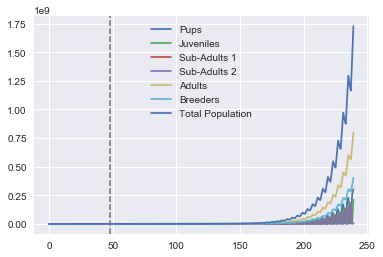

In [52]:
##Be sure to test these models with numbers (troop sizes/age distribution) from observation data

total_gen = 4*60 ##16 generations = 4 years  <=> 4x generations = x years

##Initialize population vectors
P = [0]*total_gen
J = [0]*total_gen
S1 = [0]*total_gen
S2 = [0]*total_gen
A = [0]*total_gen
R = [0]*total_gen
T = [0]*total_gen


##Enter parameter values (Random place holders entered for now)
b = (3.6)/4
b_d = (0.07)/4
s_p = 1 - (0.25*0.701)
s_j = 1 - (0.25*0.345)
s_s = 1 - (0.25*0.216)
s_a = 1 - (0.25*0.143)

parameter_list = [b,b_d,s_p,s_j,s_s,s_a]
string_list = ['b','b_d','s_p','s_j','s_s','s_a']

##Initial conditions
P[0] = 15
J[0] = 5
S1[0] = 6
S2[0] = 6
A[0] = 15
R[0] = 7
T[0] = P[0]+J[0]+S1[0]+S2[0]+A[0]+R[0]

IC_list = [P[0],J[0],S1[0],S2[0],A[0],R[0],T[0]]
IC_str = ['P0','J0','S10','S20','A0','R0','T0']

#############################################################
##Identifying the wet/dry seasons
wet_seas1 = []
wet_seas2 = []

for i in range(total_gen):
    if i == 0:
        wet_seas1.append(1)
        wet_seas2.append(2)
    else:
        wet_seas1.append(wet_seas1[i-1]+4)
        wet_seas2.append(wet_seas2[i-1]+4)
        
wet_seas = wet_seas1 + wet_seas2
##############################################################

##The model
for i in range(0,total_gen-1):
    
    ##Conditions for up to 12 years (lifespan)
    if i < 48:
        if i in wet_seas:   
            P[i+1] = b*R[i]

            J[i+1] = s_p*P[i]

            S1[i+1] = s_j*J[i]

            S2[i+1] = s_s*S1[i]

            A[i+1] = s_s*S2[i] + s_a*A[i]

            R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

            T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]

                
        else:
            P[i+1] = b_d*R[i]

            J[i+1] = s_p*P[i]

            S1[i+1] = s_j*J[i]

            S2[i+1] = s_s*S1[i]

            A[i+1] = s_s*S2[i] + s_a*A[i]

            R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

            T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
    ##Conditions for over twelve years (lifespan)
    else: 
        if i in wet_seas:
            P[i+1] = b*R[i]

            J[i+1] = s_p*P[i]

            S1[i+1] = s_j*J[i]

            S2[i+1] = s_s*S1[i]

            A[i+1] = s_s*S2[i] + s_a*A[i] - (s_a/48)*A[i-48]

            R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]
            
            T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
        else:
            P[i+1] = b_d*R[i]

            J[i+1] = s_p*P[i]

            S1[i+1] = s_j*J[i]

            S2[i+1] = s_s*S1[i]

            A[i+1] = s_s*S2[i] + s_a*A[i] - (s_a/48)*A[i-48]

            R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]
            
            T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]

    
##Build a plot
plt.plot(range(0,total_gen),P,label = "Pups")
plt.plot(range(0,total_gen),J,label = "Juveniles")
plt.plot(range(0,total_gen),S1,label = "Sub-Adults 1")
plt.plot(range(0,total_gen),S1,label = "Sub-Adults 2")
plt.plot(range(0,total_gen),A, label = "Adults")
plt.plot(range(0,total_gen),R, label = "Breeders")
plt.plot(range(0,total_gen),T, label = "Total Population")


plt.legend()

##Print parameters
for j in range(len(parameter_list)):
    print(string_list[j] + ': ',parameter_list[j])
    
##DataFrame of model results
pop_size = pd.DataFrame(np.transpose([P,J,S1,S2,A,R,T]), columns = ["Pups","Juveniles","Sub-Adults(1)","Sub-Adults(2)","Adults","Breeders","Total Population"])
plt.axvline(48,color = 'gray', linestyle = 'dashed')

# Model w/ wet/dry seasons and pseudo-carrying capacity

b:  0.9
b_d:  0.0175
s_p:  0.82475
s_j:  0.9137500000000001
s_s:  0.946
s_a:  0.96425


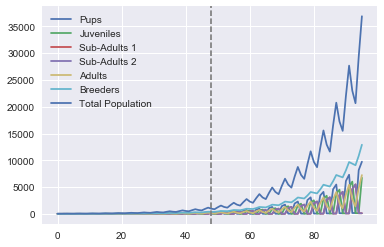

In [53]:
##Be sure to test these models with numbers (troop sizes/age distribution) from observation data

total_gen = 4*24 ##16 generations = 4 years  <=> 4x generations = x years

##Initialize population vectors
P = [0]*total_gen
J = [0]*total_gen
S1 = [0]*total_gen
S2 = [0]*total_gen
A = [0]*total_gen
R = [0]*total_gen
T = [0]*total_gen


##Enter parameter values (Random place holders entered for now)
b = (3.6)/4
b_d = (0.07)/4
s_p = 1 - (0.25*0.701)
s_j = 1 - (0.25*0.345)
s_s = 1 - (0.25*0.216)
s_a = 1 - (0.25*0.143)

d = 0.5

parameter_list = [b,b_d,s_p,s_j,s_s,s_a]
string_list = ['b','b_d','s_p','s_j','s_s','s_a']

##Initial conditions
P[0] = 15
J[0] = 5
S1[0] = 6
S2[0] = 6
A[0] = 15
R[0] = 7
T[0] = P[0]+J[0]+S1[0]+S2[0]+A[0]+R[0]

IC_list = [P[0],J[0],S1[0],S2[0],A[0],R[0],T[0]]
IC_str = ['P0','J0','S10','S20','A0','R0','T0']

#############################################################
##Identifying the wet/dry seasons
wet_seas1 = []
wet_seas2 = []

for i in range(total_gen):
    if i == 0:
        wet_seas1.append(1)
        wet_seas2.append(2)
    else:
        wet_seas1.append(wet_seas1[i-1]+4)
        wet_seas2.append(wet_seas2[i-1]+4)
        
wet_seas = wet_seas1 + wet_seas2
##############################################################

##The model
for i in range(0,total_gen-1):
    
    ##Conditions for up to 12 years (lifespan)
    if i < 48:
        if i in wet_seas:
            #When below carrying capacity (in wet season)
            if T[i] <= 67:
                P[i+1] = b*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + s_a*A[i]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
            ##When at carrying capacity (in wet season)   
            else:
                P[i+1] = b*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + d*s_a*A[i]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]

        ##Conditions for dry season        
        else:
            ##When below carrying capacity (in dry season)
            if T[i] <= 67:
                P[i+1] = b_d*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + s_a*A[i]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
            #When at carrying capcity (in dry season)
            else:
                P[i+1] = b_d*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + d*s_a*A[i]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
    ##Conditions for over twelve years (lifespan)
    else: 
        if i in wet_seas:
            ##When below carrying capacity (in wet season)(past life expectancy)
            if T[i]<= 67:
                P[i+1] = b*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + s_a*A[i] - (s_a/48)*A[i-48]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
            ##When at carrying capacity (in wet season)(past life expectancy)  
            else:
                P[i+1] = b*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + d*s_a*A[i] - d*(s_a/48)*A[i-48]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
        ##Conditions for dry season        
        else:
            ##When below carrying capacity (in dry season)(past life expectancy)
            if T[i] <= 67:
                P[i+1] = b_d*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + s_a*A[i] - (s_a/48)*A[i-48]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
                
            ##When at carrying capacity (in dry season)(past life expectancy)  
            else:
                P[i+1] = b_d*R[i]

                J[i+1] = s_p*P[i]

                S1[i+1] = s_j*J[i]

                S2[i+1] = s_s*S1[i]

                A[i+1] = s_s*S2[i] + d*s_a*A[i] - d*(s_a/48)*A[i-48]

                R[i+1] = (0.5*(s_s*S2[i])) + s_a*R[i]

                T[i+1] = P[i+1]+J[i+1]+S1[i+1]+S2[i+1]+A[i+1]+R[i+1]
    
##Build a plot


plt.plot(range(0,total_gen),P,label = "Pups")
plt.plot(range(0,total_gen),J,label = "Juveniles")
plt.plot(range(0,total_gen),S1,label = "Sub-Adults 1")
plt.plot(range(0,total_gen),S1,label = "Sub-Adults 2")
plt.plot(range(0,total_gen),A, label = "Adults")
plt.plot(range(0,total_gen),R, label = "Breeders")
plt.plot(range(0,total_gen),T,label = "Total Population")


plt.legend()

##Print parameters
for j in range(len(parameter_list)):
    print(string_list[j] + ': ',parameter_list[j])
    
##DataFrame of model results
pop_size = pd.DataFrame(np.transpose([P,J,S1,S2,A,R,T]), columns = ["Pups","Juveniles","Sub-Adults(1)","Sub-Adults(2)","Adults","Breeders","Total Population"])
plt.axvline(48,color = 'gray', linestyle = 'dashed')


In [54]:
##Go through Bonnie's paper for transmission information

##Look for stochastic modeling libraries for python##
    ##look for deterministic => stochastic using Gillespie
    
##For carrying capacity, instead of redistributing age, scale the death rate for adults

# Stochastic Conversion

In [55]:
import stochpy
import libsbml
#stochpy.Demo()


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

In [56]:
smod = stochpy.SSA()

smod.Model(model_file = "mong_model.xml",dir = smod.model_dir)
smod.DoStochSim(method="direct",mode="time",end=48)
smod.PlotSpeciesTimeSeries()

'NoneType' object has no attribute 'getId'


SystemExit: 

C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
